# School Dataset
The goal of this project is to predict the placement status of students based on specific variables. Another goal is to predict the salaries these students will make. I plan to use regression algorithms to solve this task.

# Importing the data

In [90]:
import pandas as pd
import numpy as np
PLACEMENT_PATH = "./datasets_596958_1073629_Placement_Data_Full_Class.csv"

def load_placement_data(PATH=PLACEMENT_PATH):
    return pd.read_csv(PATH)

placement = load_placement_data()
placement.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


# Understanding the data

In [91]:
placement.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


array([[<AxesSubplot:title={'center':'sl_no'}>,
        <AxesSubplot:title={'center':'ssc_p'}>,
        <AxesSubplot:title={'center':'hsc_p'}>],
       [<AxesSubplot:title={'center':'degree_p'}>,
        <AxesSubplot:title={'center':'etest_p'}>,
        <AxesSubplot:title={'center':'mba_p'}>],
       [<AxesSubplot:title={'center':'salary'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

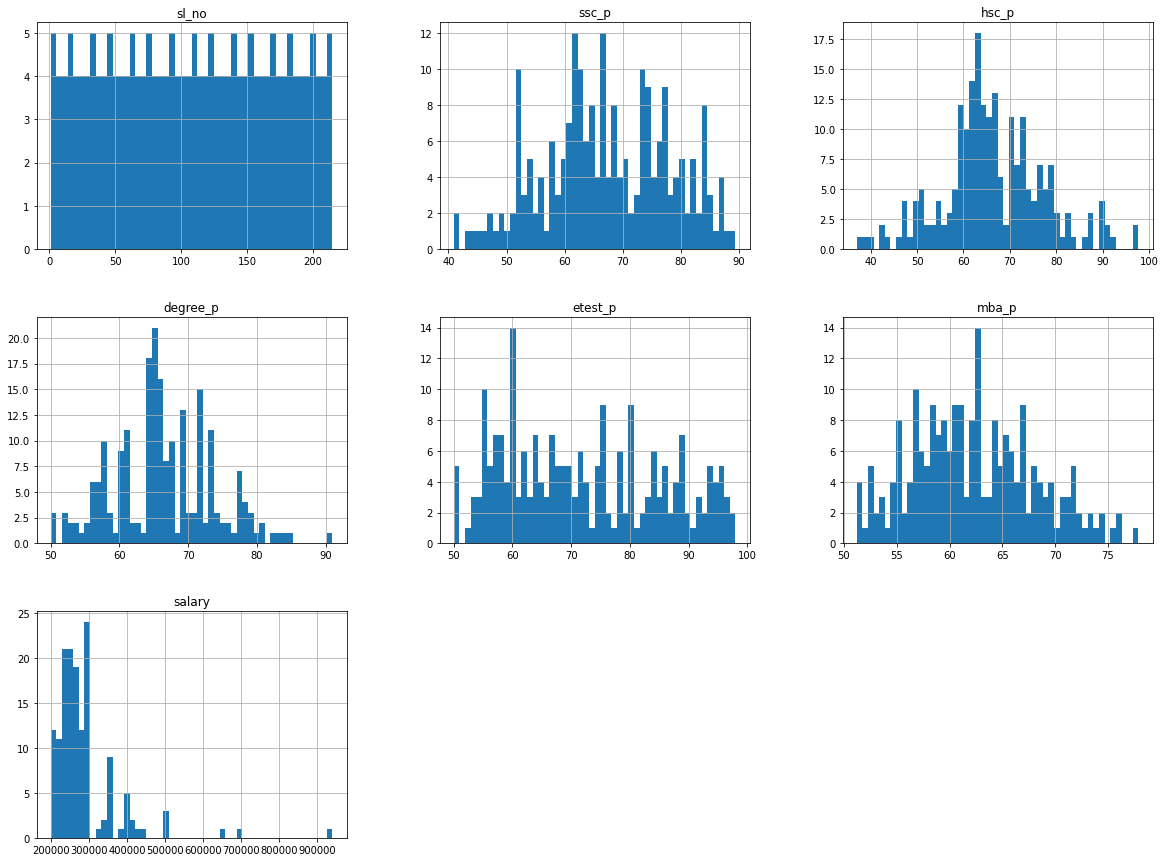

In [92]:
%matplotlib inline

import matplotlib.pyplot as plt
placement.hist(bins=50, figsize=(20,15))

# Stratify the data
I believe the biggest predictor in salary will be the placement status of the students. To get a decent test set I made the groups "Placed" and "Not placed" proportional to how they appear in the entire set.

In [93]:
count = 0
for item in placement["status"]:
    if (item == "Placed"):
        count = count +1
print(count/len(placement["status"]))

0.6883720930232559


<AxesSubplot:>

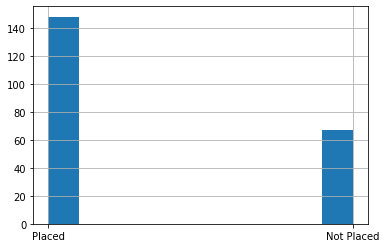

In [94]:
placement["status"].hist()

In [95]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size =.2, random_state=42)
for train_index, test_index in split.split(placement, placement["status"]):
    strat_train_set = placement.loc[train_index]
    strat_test_set = placement.loc[test_index]

In [96]:
count = 0
for item in strat_test_set["status"]:
    if (item == "Placed"):
        count = count +1
print(count/len(strat_test_set))

0.6976744186046512


In [97]:
placement = strat_train_set.copy()
placement_labels = placement[["salary"]]
placement.drop(["salary"], axis=1, inplace =True)
placement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 147 to 196
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           172 non-null    int64  
 1   gender          172 non-null    object 
 2   ssc_p           172 non-null    float64
 3   ssc_b           172 non-null    object 
 4   hsc_p           172 non-null    float64
 5   hsc_b           172 non-null    object 
 6   hsc_s           172 non-null    object 
 7   degree_p        172 non-null    float64
 8   degree_t        172 non-null    object 
 9   workex          172 non-null    object 
 10  etest_p         172 non-null    float64
 11  specialisation  172 non-null    object 
 12  mba_p           172 non-null    float64
 13  status          172 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 20.2+ KB


# Data cleaning and preperation
If we look into the data there are many categorical values mostly between two categories, but sometimes three. I would like to use a regression algorithm on this data so I used an ordinal encoder for this data and scaled it with minmax.

There are also some numerical values that I scaled using minmax

Finally, you can see that there is some null values for the salaries. This is due to the students not having a job. I used an imputer with a constant value of 0 to fill in this data and scaled it using minmax.

In [98]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant')

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

cat_attribs = ["gender", "ssc_b", "hsc_b", "hsc_s", "degree_t", "workex", "specialisation", "status"]
num_attribs = ["ssc_p", "hsc_p", "degree_p", "etest_p", "mba_p"]

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="constant")),
    ('scaler', MinMaxScaler()),
])

catpipe = Pipeline([
    ('encoder', OrdinalEncoder()),
    ('scaler', MinMaxScaler()),
])


full_data_pipeline = ColumnTransformer([
    ("cat", catpipe, cat_attribs),
    ("num", pipeline, num_attribs),
])

label_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="constant"))
])

placement_prep = full_data_pipeline.fit_transform(placement)
placement_label_prep = label_pipeline.fit_transform(placement_labels)

# Linear Regression model

In [100]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
placement_label_prep = np.ravel(placement_label_prep)
lin_reg.fit(placement_prep, placement_label_prep)

LinearRegression()

In [101]:
some_data = placement_prep[:5]
some_labels = placement_label_prep[:5]
print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [310825.26936141 -15377.36705318   6278.25736382 294217.48339909
 265115.29012195]
Labels: [300000.0, 0.0, 0.0, 360000.0, 265000.0]


In [102]:
from sklearn.metrics import mean_squared_error
placement_predictions = lin_reg.predict(placement_prep)
lin_mse = mean_squared_error(placement_label_prep, placement_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)


79009.8939671857


### Results
A typical prediction error of $79,000 is less than acceptable. It's possible we could squeeze more acceptable results by fine tuning the model, but I am going to try a more complex model

test = strat_test_set.copy()
labels = test[["salary"]]
test.drop("salary", axis=1, inplace=True)
test_prep = full_data_pipeline.fit_transform(test)
labels_prep = label_pipeline.fit_transform(labels)

some_data = test_prep[:5]
some_labels = labels_prep[:5]
print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))

In [123]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(placement_prep, placement_label_prep)

placement_predictions = forest_reg.predict(placement_prep)
forest_mse = mean_squared_error(placement_label_prep, placement_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

33114.01025245961


### Ensemble results
This is much better! A 40% increase in performace! Lets fine tune the model to get everything we can out of it.

For this I am going to use a grid search to fine tune the _hyperparameters_


In [127]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [5, 10, 200], 'max_features': [5, 8, 10, 12,13]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(placement_prep, placement_label_prep)
print(grid_search.best_params_)
print(grid_search.best_estimator_)


{'max_features': 5, 'n_estimators': 200}
RandomForestRegressor(max_features=5, n_estimators=200)


In [128]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

100601.83849832814 {'max_features': 5, 'n_estimators': 5}
93229.35658585103 {'max_features': 5, 'n_estimators': 10}
88452.93845699231 {'max_features': 5, 'n_estimators': 200}
98394.8944156089 {'max_features': 8, 'n_estimators': 5}
92974.44961209649 {'max_features': 8, 'n_estimators': 10}
89165.50671710247 {'max_features': 8, 'n_estimators': 200}
98645.94961167901 {'max_features': 10, 'n_estimators': 5}
89103.10909513858 {'max_features': 10, 'n_estimators': 10}
88552.76555081428 {'max_features': 10, 'n_estimators': 200}
99622.70488061992 {'max_features': 12, 'n_estimators': 5}
94116.75343588369 {'max_features': 12, 'n_estimators': 10}
90793.48002539526 {'max_features': 12, 'n_estimators': 200}
93695.6258989983 {'max_features': 13, 'n_estimators': 5}
94253.63696257173 {'max_features': 13, 'n_estimators': 10}
89732.39946049017 {'max_features': 13, 'n_estimators': 200}


In [130]:
feature_importances = grid_search.best_estimator_.feature_importances_
attributes = cat_attribs+ num_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.47296637391732466, 'status'),
 (0.16059912207016216, 'ssc_p'),
 (0.10680966854229956, 'degree_p'),
 (0.09171838853926828, 'hsc_p'),
 (0.05683320654156233, 'mba_p'),
 (0.03873963651300495, 'etest_p'),
 (0.017451792806683922, 'workex'),
 (0.01271980668245032, 'degree_t'),
 (0.011568704289886858, 'specialisation'),
 (0.008849211553362244, 'gender'),
 (0.008655909173070506, 'ssc_b'),
 (0.006919007884999088, 'hsc_b'),
 (0.006169171485925061, 'hsc_s')]